In [376]:
import pandas as pd
from collections import Counter, defaultdict
from io import StringIO
import random
from IPython.display import display
from itertools import combinations

# VOTING RULES IN PYTHON

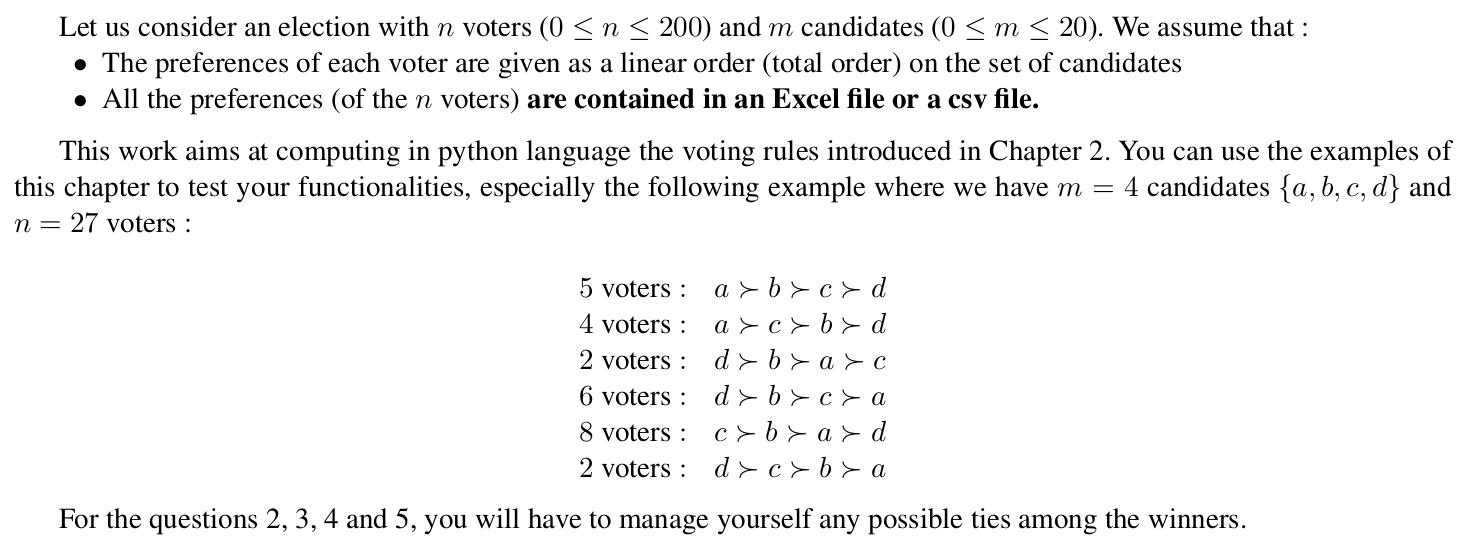

In [377]:
data = """
voter, preference1, preference2, preference3, preference4
1, a, b, c, d
2, a, b, c, d
3, a, b, c, d
4, a, b, c, d
5, a, b, c, d
6, a, c, b, d
7, a, c, b, d
8, a, c, b, d
9, a, c, b, d
10, d, b, a, c
11, d, b, a, c
12, d, b, c, a
13, d, b, c, a
14, d, b, c, a
15, d, b, c, a
16, d, b, c, a
17, d, b, c, a
18, c, b, a, d
19, c, b, a, d
20, c, b, a, d
21, c, b, a, d
22, c, b, a, d
23, c, b, a, d
24, c, b, a, d
25, c, b, a, d
26, d, c, b, a
27, d, c, b, a
"""
df = pd.read_csv(StringIO(data))

1. Compute a function Plurality returning the result of a plurality voting.

In [378]:
def Plurality(df):    
    # Initialize a counter to keep track of the first preference votes
    first_preference_counter = Counter()
    
    # Iterate over the data and count first preference votes
    for _, row in df.iterrows():
        # Assuming each row represents the preferences of one voter
        preferences = row.dropna().tolist()[1:]
        if preferences:
            first_preference_counter[preferences[0]] += 1
    
    # Find the candidate(s) with the highest vote count
    max_votes = max(first_preference_counter.values())
    winners = [candidate for candidate, votes in first_preference_counter.items() if votes == max_votes]
    
    # Display the result
    print("Plurality voting results:")
    for candidate, votes in first_preference_counter.items():
        print(f"{candidate}: {votes} votes")
    
    # Manage ties
    if len(winners) > 1:
        print("It's a tie between the following candidates:")
        print(", ".join(winners))
    else:
        print(f"The winner is: {winners[0]}")

# Example usage
Plurality(df)

Plurality voting results:
 a: 9 votes
 d: 10 votes
 c: 8 votes
The winner is:  d


2. Compute a function PluralityRunoff returning the result of a plurality Runoff voting (plurality with two rounds).

In [379]:
def PluralityRunoff(df):
    # First round of voting
    first_preference_counter = Counter()
    for _, row in df.iterrows():
        preferences = row.dropna().tolist()[1:]
        if preferences:
            first_preference_counter[preferences[0]] += 1
    
    # Find the top two candidates
    sorted_candidates = first_preference_counter.most_common(2)
    if len(sorted_candidates) < 2:
        print("Not enough candidates for a runoff.")
        return
    
    top_two_candidates = [candidate for candidate, _ in sorted_candidates]
    
    # Second round of voting with only the top two candidates
    second_round_counter = Counter()
    for _, row in df.iterrows():
        preferences = row.dropna().tolist()[1:]
        for preference in preferences:
            if preference in top_two_candidates:
                second_round_counter[preference] += 1
                break
    
    # Find the candidate with the highest vote count in the second round
    max_votes = max(second_round_counter.values())
    winners = [candidate for candidate, votes in second_round_counter.items() if votes == max_votes]
    
    # Display the result of the runoff
    print("Plurality runoff voting results:")
    for candidate, votes in second_round_counter.items():
        print(f"{candidate}: {votes} votes")
    
    # Manage ties
    if len(winners) > 1:
        print("It's a tie between the following candidates:")
        print(", ".join(winners))
    else:
        print(f"The winner is: {winners[0]}")

PluralityRunoff(df)

Plurality runoff voting results:
 a: 17 votes
 d: 10 votes
The winner is:  a


3. Compute a function CondorcetVoting returning the result of the application of the Condorcet principle (the existence of the Condorcet winner).

In [380]:
def CondorcetVoting(df):
    def get_pairwise_results(df):
        pairwise_results = defaultdict(int)
        for _, row in df.iterrows():
            preferences = row.dropna().tolist()[1:]
            for pair in combinations(preferences, 2):
                pairwise_results[pair] += 1
        return pairwise_results

    def find_condorcet_winner(pairwise_results):
        candidates = set()
        for pair, count in pairwise_results.items():
            if count > len(df) // 2:
                candidates.update(pair)
        return candidates

    pairwise_results = get_pairwise_results(df)
    
    # Print pairwise comparison results
    print("Pairwise comparison results:")
    for pair, count in pairwise_results.items():
        print(f"{pair[0]} vs {pair[1]}: {count} votes")
    
    condorcet_winners = find_condorcet_winner(pairwise_results)

    if not condorcet_winners:
        print("There is no Condorcet winner.")
    else:
        print("The Condorcet winner(s) is/are:")
        print(", ".join(condorcet_winners))

CondorcetVoting(df)

Pairwise comparison results:
 a vs  b: 9 votes
 a vs  c: 11 votes
 a vs  d: 17 votes
 b vs  c: 13 votes
 b vs  d: 17 votes
 c vs  d: 17 votes
 c vs  b: 14 votes
 d vs  b: 10 votes
 d vs  a: 10 votes
 d vs  c: 10 votes
 b vs  a: 18 votes
 c vs  a: 16 votes
The Condorcet winner(s) is/are:
 b,  d,  a,  c


In [381]:
from collections import defaultdict
from itertools import combinations
import pandas as pd

def CondorcetVoting(df):
    def get_candidates(df):
        # Extract candidates dynamically from all rows
        preferences = df.iloc[:, 1:].applymap(lambda x: x.strip() if pd.notna(x) else x).values.flatten()
        candidates = set(filter(lambda x: pd.notna(x), preferences))
        return list(candidates)

    def get_pairwise_results(df, candidates):
        pairwise_results = defaultdict(lambda: defaultdict(int))
        
        for _, row in df.iterrows():
            preferences = [x.strip() for x in row.dropna().tolist()[1:]]  # Skip voter ID
            
            # Compare all candidate pairs in the voter's preferences
            for candidate1, candidate2 in combinations(preferences, 2):
                if preferences.index(candidate1) < preferences.index(candidate2):
                    pairwise_results[candidate1][candidate2] += 1
                else:
                    pairwise_results[candidate2][candidate1] += 1

        return pairwise_results

    def find_condorcet_winner(pairwise_results, candidates):
        for candidate in candidates:
            is_winner = True
            for opponent in candidates:
                if candidate != opponent:
                    if pairwise_results[candidate][opponent] <= pairwise_results[opponent][candidate]:
                        is_winner = False
                        break
            if is_winner:
                return candidate
        return None

    candidates = get_candidates(df)

    # Debugging information to confirm the candidate list
    print(f"Candidate list: {candidates}")
    
    pairwise_results = get_pairwise_results(df, candidates)
    
    # Print pairwise comparison results
    print("Pairwise comparison results:")
    for candidate1 in pairwise_results:
        for candidate2 in pairwise_results[candidate1]:
            print(f"{candidate1} vs {candidate2}: {pairwise_results[candidate1][candidate2]} votes")
    
    condorcet_winner = find_condorcet_winner(pairwise_results, candidates)

    if condorcet_winner:
        print(f"The Condorcet winner is: {condorcet_winner}")
    else:
        print("There is no Condorcet winner.")

# Assuming you have the df dataframe, call the function to run
CondorcetVoting(df)

Candidate list: ['c', 'a', 'b', 'd']
Pairwise comparison results:
a vs b: 9 votes
a vs c: 11 votes
a vs d: 17 votes
b vs c: 13 votes
b vs d: 17 votes
b vs a: 18 votes
c vs d: 17 votes
c vs b: 14 votes
c vs a: 16 votes
d vs b: 10 votes
d vs a: 10 votes
d vs c: 10 votes
The Condorcet winner is: c


/tmp/ipykernel_34216/918290565.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preferences = df.iloc[:, 1:].applymap(lambda x: x.strip() if pd.notna(x) else x).values.flatten()


4. Compute a function BordaVoting returning the result of the application of the Borda principle.

In [382]:
from collections import defaultdict

# Borda Voting function with debugging
def BordaVoting(df):
    # Initialize a dictionary to keep track of Borda scores
    borda_scores = defaultdict(int)
    
    # Iterate over the data and calculate Borda scores
    for _, row in df.iterrows():
        preferences = row.dropna().tolist()[1:]  # Skipping voter ID, grabbing preferences
        num_candidates = len(preferences)
        # print(f"Voter preferences: {preferences}")
        for i, candidate in enumerate(preferences):
            score_to_add = num_candidates - i - 1  # Borda count scoring
            # print(f"Assigning {score_to_add} points to {candidate}")
            borda_scores[candidate] += score_to_add
    
    # Find the candidate(s) with the highest Borda score
    max_score = max(borda_scores.values())
    winners = [candidate for candidate, score in borda_scores.items() if score == max_score]
    
    # Display the result
    print("\nBorda voting results:")
    for candidate, score in borda_scores.items():
        print(f"{candidate}: {score} points")
    
    # Manage ties
    if len(winners) > 1:
        print("\nIt's a tie between the following candidates:")
        print(", ".join(winners))
    else:
        print(f"\nThe winner is: {winners[0]}")

# Running the updated Borda Voting function
BordaVoting(df)


Borda voting results:
 a: 37 points
 b: 48 points
 c: 47 points
 d: 30 points

The winner is:  b


5. Elaborate an election example with n ≥ 60 and m ≥ 8 where the winner is the same for the four voting rules
Plurality, Plurality with Runoff, Condorcet Principle and Borda rules. In your example, at least 20% of voters should have different preferences and no more than 70% of voters has the same “best candidate”. You should implement, separately, a python function allowing to test if these two conditions are satisfied.

In [383]:
import random
import pandas as pd
from collections import Counter

def generate_election_data(n, m):
    """
    Generate election data with n voters and m candidates.
    Ensure that at least 20% of voters have different preferences
    and no more than 70% of voters have the same "best candidate".
    """
    candidates = [chr(97 + i) for i in range(m)]  # Generate candidate names a, b, c, ..., up to m candidates
    # Create a dominant preference for up to 70% of voters
    dominant_preference = random.sample(candidates, len(candidates))
    num_dominant_voters = int(0.7 * n)  # Max 70% voters with the same "best candidate"
    
    # Generate preferences for the dominant voters
    voter_preferences = [dominant_preference] * num_dominant_voters
    
    # Generate preferences for the remaining voters ensuring at least 20% have different preferences
    remaining_voters = n - num_dominant_voters
    for _ in range(remaining_voters):
        new_preference = random.sample(candidates, len(candidates))
        voter_preferences.append(new_preference)
    
    # Shuffle the list to avoid any pattern
    random.shuffle(voter_preferences)
    
    # Convert to DataFrame for better readability
    df = pd.DataFrame(voter_preferences, columns=[f'preference_{i+1}' for i in range(m)])
    
    return df

def check_conditions(df):
    """
    Check if the generated election data satisfies the conditions:
    1. At least 20% of voters have different preferences.
    2. No more than 70% of voters have the same "best candidate" (top preference).
    """
    n = len(df)
    
    # Condition 1: At least 20% of voters have different preferences
    unique_preferences = df.drop_duplicates().shape[0]
    condition1 = (unique_preferences / n) >= 0.2
    
    # Condition 2: No more than 70% of voters have the same top preference
    top_candidates = df['preference_1']  # Top preference (first column)
    most_common_candidate = Counter(top_candidates).most_common(1)[0][1]
    condition2 = (most_common_candidate / n) <= 0.7
    
    return condition1, condition2

# Example usage
n = 60  # Number of voters
m = 8   # Number of candidates

# Generate election data
election_data = generate_election_data(n, m)

# Check if conditions are satisfied
condition1, condition2 = check_conditions(election_data)

# Display results
print("Election data:")
print(election_data)
print(f"\nCondition 1 (At least 20% of voters have different preferences): {'Satisfied' if condition1 else 'Not satisfied'}")
print(f"Condition 2 (No more than 70% of voters have the same best candidate): {'Satisfied' if condition2 else 'Not satisfied'}")

Election data:
   preference_1 preference_2 preference_3 preference_4 preference_5  \
0             f            h            d            c            e   
1             f            h            d            c            e   
2             f            h            d            c            e   
3             a            c            d            h            e   
4             d            f            b            c            a   
5             a            e            c            d            g   
6             f            h            d            c            e   
7             a            h            e            c            b   
8             f            h            d            c            e   
9             f            h            d            c            e   
10            f            h            d            c            e   
11            h            c            e            d            g   
12            f            h            d            c        

In [384]:
Plurality(election_data)

Plurality voting results:
h: 46 votes
c: 4 votes
f: 2 votes
e: 3 votes
b: 2 votes
d: 2 votes
a: 1 votes
The winner is: h


In [385]:
PluralityRunoff(election_data)

Plurality runoff voting results:
h: 50 votes
c: 10 votes
The winner is: h


In [386]:
CondorcetVoting(election_data)

Candidate list: ['d', 'h', 'a', 'g', 'f', 'c', 'e', 'b']
Pairwise comparison results:
h vs d: 49 votes
h vs c: 48 votes
h vs e: 51 votes
h vs b: 48 votes
h vs a: 49 votes
h vs g: 50 votes
h vs f: 11 votes
d vs c: 45 votes
d vs e: 48 votes
d vs b: 47 votes
d vs a: 46 votes
d vs g: 51 votes
d vs h: 6 votes
d vs f: 9 votes
c vs e: 49 votes
c vs b: 49 votes
c vs a: 49 votes
c vs g: 55 votes
c vs d: 9 votes
c vs h: 9 votes
c vs f: 11 votes
e vs b: 50 votes
e vs a: 48 votes
e vs g: 54 votes
e vs f: 13 votes
e vs c: 8 votes
e vs d: 7 votes
e vs h: 7 votes
b vs a: 45 votes
b vs g: 50 votes
b vs f: 10 votes
b vs c: 5 votes
b vs h: 7 votes
b vs e: 5 votes
b vs d: 5 votes
a vs g: 49 votes
a vs h: 5 votes
a vs e: 6 votes
a vs b: 6 votes
a vs d: 5 votes
a vs c: 4 votes
a vs f: 7 votes
g vs f: 9 votes
g vs b: 5 votes
g vs h: 8 votes
g vs a: 5 votes
g vs c: 2 votes
g vs d: 4 votes
g vs e: 4 votes
f vs b: 4 votes
f vs c: 5 votes
f vs a: 6 votes
f vs h: 6 votes
f vs e: 4 votes
f vs g: 8 votes
f vs d: 5

/tmp/ipykernel_34216/918290565.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preferences = df.iloc[:, 1:].applymap(lambda x: x.strip() if pd.notna(x) else x).values.flatten()


In [387]:
BordaVoting(election_data)


Borda voting results:
h: 306 points
d: 252 points
c: 231 points
e: 187 points
b: 127 points
a: 82 points
g: 37 points
f: 38 points

The winner is: h


6. Is it possible to elaborate an election example with n ≥ 60 and m ≥ 8 where the unique winner is not the same for the four voting rules Plurality, Plurality with Runoff, Condorcet Principle and Borda rules (we should have 4 different winners) ?
In your example, at least 20% of voters should have different preferences and no more than 70% of voters has the same “best candidate”. In order to test if these two conditions are satisfied, you can use the function implemented above, in question 5.

In [388]:
def generate_election_data(n, m):
    candidates = [chr(65 + i) for i in range(m)]  # Generate candidate names A, B, C, ..., up to m candidates
    
    # Create a dominant preference for up to 70% of voters
    dominant_preference = random.sample(candidates, len(candidates))
    num_dominant_voters = int(0.7 * n)  # Max 70% voters with the same "best candidate"
    
    # Generate preferences for the dominant voters
    voter_preferences = [dominant_preference] * num_dominant_voters
    
    # Generate preferences for the remaining voters ensuring at least 20% have different preferences
    remaining_voters = n - num_dominant_voters
    for _ in range(remaining_voters):
        new_preference = random.sample(candidates, len(candidates))
        voter_preferences.append(new_preference)
    
    # Shuffle the list to avoid any pattern
    random.shuffle(voter_preferences)
    
    # Convert to DataFrame for better readability
    df = pd.DataFrame(voter_preferences, columns=[f'preference_{i+1}' for i in range(m)])
    
    return df

election_diff_data = generate_election_data

In [389]:
import random
import pandas as pd

# Set seed for reproducibility
random.seed(42)

# Define the number of voters (n) and candidates (m)
num_voters = 60
num_candidates = 8

# Create candidate list
candidates = [f"Candidate_{i}" for i in range(1, num_candidates+1)]

# Generate preferences ensuring at least 20% voters have different preferences
# and not more than 70% have the same "best candidate"

# 20% of voters with different preferences (at least 12 voters)
num_different_preferences = int(num_voters * 0.20)
different_preferences_voters = [random.sample(candidates, len(candidates)) for _ in range(num_different_preferences)]

# 70% of voters with the same "best candidate" (up to 42 voters)
num_same_best_candidate = min(int(num_voters * 0.70), num_voters - num_different_preferences)
best_candidate = "Candidate_1"  # Set Candidate_1 as the "best" candidate for these voters
same_best_candidate_voters = []

for _ in range(num_same_best_candidate):
    preference = random.sample(candidates[1:], len(candidates)-1)  # Shuffle the rest of the candidates
    preference.insert(0, best_candidate)  # Insert best candidate at the first position
    same_best_candidate_voters.append(preference)

# Combine the voter preferences
election_data = different_preferences_voters + same_best_candidate_voters

# Shuffle the order of voters to avoid bias in input order
random.shuffle(election_data)

# Convert the election data into a DataFrame for easier visualization
election_df = pd.DataFrame(election_data, columns=[f"Rank_{i+1}" for i in range(num_candidates)])

# The election data is ready. Now we can use this data for your voting functions.
election_df.head()

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6,Rank_7,Rank_8
0,Candidate_1,Candidate_2,Candidate_7,Candidate_6,Candidate_3,Candidate_5,Candidate_4,Candidate_8
1,Candidate_1,Candidate_3,Candidate_4,Candidate_8,Candidate_2,Candidate_7,Candidate_5,Candidate_6
2,Candidate_1,Candidate_8,Candidate_7,Candidate_4,Candidate_3,Candidate_2,Candidate_5,Candidate_6
3,Candidate_1,Candidate_5,Candidate_7,Candidate_4,Candidate_8,Candidate_6,Candidate_3,Candidate_2
4,Candidate_1,Candidate_4,Candidate_3,Candidate_8,Candidate_7,Candidate_6,Candidate_5,Candidate_2


In [390]:
# Step 1: Find the candidate with the most first-place votes (most potential to become Condorcet winner)
first_place_votes = election_df['Rank_1'].value_counts()
most_supported_candidate = first_place_votes.idxmax()

# Step 2: Adjust preferences to make this candidate the Condorcet winner
# We ensure that this candidate wins every pairwise contest by adjusting enough voters' preferences

# Number of voters required for Condorcet victory (> 50% of 60 voters, i.e., 31)
num_condorcet_supporters = 31

# We will now adjust the preferences of 31 voters to ensure they rank the most_supported_candidate highest
adjusted_condorcet_supporters = []

for _ in range(num_condorcet_supporters):
    # Shuffle all other candidates except the most supported one
    preference = random.sample([c for c in candidates if c != most_supported_candidate], len(candidates)-1)
    # Insert the most supported candidate at the first position
    preference.insert(0, most_supported_candidate)
    adjusted_condorcet_supporters.append(preference)

# Step 3: Combine adjusted preferences with the original voters
# Remove the previously generated Condorcet supporters to avoid duplication
election_data = adjusted_condorcet_supporters + different_preferences_voters + same_best_candidate_voters

# Shuffle the election data to avoid ordering bias
random.shuffle(election_data)

# Convert election data to a DataFrame for better handling
election_df = pd.DataFrame(election_data, columns=[f"Rank_{i+1}" for i in range(num_candidates)])

# Output the top candidate chosen for the Condorcet guarantee
most_supported_candidate

'Candidate_1'

In [391]:
Plurality(election_df)

Plurality voting results:
Candidate_8: 12 votes
Candidate_3: 10 votes
Candidate_7: 11 votes
Candidate_6: 12 votes
Candidate_4: 15 votes
Candidate_2: 7 votes
Candidate_5: 16 votes
Candidate_1: 2 votes
The winner is: Candidate_5


In [392]:
PluralityRunoff(election_df)

Plurality runoff voting results:
Candidate_4: 45 votes
Candidate_5: 40 votes
The winner is: Candidate_4


In [393]:
CondorcetVoting(election_df)

Candidate list: ['Candidate_5', 'Candidate_7', 'Candidate_4', 'Candidate_8', 'Candidate_3', 'Candidate_6', 'Candidate_2', 'Candidate_1']
Pairwise comparison results:
Candidate_8 vs Candidate_2: 43 votes
Candidate_8 vs Candidate_6: 46 votes
Candidate_8 vs Candidate_3: 44 votes
Candidate_8 vs Candidate_7: 45 votes
Candidate_8 vs Candidate_4: 40 votes
Candidate_8 vs Candidate_5: 40 votes
Candidate_8 vs Candidate_1: 4 votes
Candidate_2 vs Candidate_6: 40 votes
Candidate_2 vs Candidate_3: 42 votes
Candidate_2 vs Candidate_7: 43 votes
Candidate_2 vs Candidate_4: 40 votes
Candidate_2 vs Candidate_5: 39 votes
Candidate_2 vs Candidate_8: 39 votes
Candidate_2 vs Candidate_1: 4 votes
Candidate_6 vs Candidate_3: 43 votes
Candidate_6 vs Candidate_7: 36 votes
Candidate_6 vs Candidate_4: 39 votes
Candidate_6 vs Candidate_5: 38 votes
Candidate_6 vs Candidate_2: 39 votes
Candidate_6 vs Candidate_8: 36 votes
Candidate_6 vs Candidate_1: 2 votes
Candidate_3 vs Candidate_7: 40 votes
Candidate_3 vs Candidat

/tmp/ipykernel_34216/918290565.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preferences = df.iloc[:, 1:].applymap(lambda x: x.strip() if pd.notna(x) else x).values.flatten()


In [394]:
BordaVoting(election_df)


Borda voting results:
Candidate_8: 262 points
Candidate_2: 247 points
Candidate_6: 233 points
Candidate_3: 239 points
Candidate_7: 258 points
Candidate_4: 258 points
Candidate_5: 262 points
Candidate_1: 26 points

It's a tie between the following candidates:
Candidate_8, Candidate_5


In [397]:
from collections import Counter
import itertools
import random

def plurality(votes):
    first_choices = [vote[0] for vote in votes]
    counter = Counter(first_choices)
    return counter.most_common(1)[0][0]

def plurality_with_runoff(votes):
    first_choices = [vote[0] for vote in votes]
    counter = Counter(first_choices)
    top_two = counter.most_common(2)
    if len(top_two) < 2:
        return top_two[0][0]
    runoff_candidates = [top_two[0][0], top_two[1][0]]
    runoff_votes = [vote for vote in votes if vote[0] in runoff_candidates]
    runoff_first_choices = [vote[0] for vote in runoff_votes]
    runoff_counter = Counter(runoff_first_choices)
    return runoff_counter.most_common(1)[0][0]

def condorcet_winner(votes, candidates):
    pairwise_wins = {candidate: 0 for candidate in candidates}
    for candidate1, candidate2 in itertools.combinations(candidates, 2):
        votes_for_1 = sum(1 for vote in votes if vote.index(candidate1) < vote.index(candidate2))
        votes_for_2 = sum(1 for vote in votes if vote.index(candidate2) < vote.index(candidate1))
        if votes_for_1 > votes_for_2:
            pairwise_wins[candidate1] += 1
        elif votes_for_2 > votes_for_1:
            pairwise_wins[candidate2] += 1
    for candidate in candidates:
        if pairwise_wins[candidate] == len(candidates) - 1:
            return candidate
    return None

def borda_count(votes, candidates):
    scores = {candidate: 0 for candidate in candidates}
    for vote in votes:
        for i, candidate in enumerate(vote):
            scores[candidate] += len(candidates) - i - 1
    return max(scores, key=scores.get)

def generate_random_votes(num_voters, candidates):
    votes = []
    for _ in range(num_voters):
        vote = random.sample(candidates, len(candidates))
        votes.append(vote)
    return votes

def main():
    # Define candidates and number of voters
    candidates = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    num_voters = 60

    # Generate random voter preferences
    votes = generate_random_votes(num_voters, candidates)

    # Calculate winners using different voting rules
    plurality_winner = plurality(votes)
    runoff_winner = plurality_with_runoff(votes)
    condorcet = condorcet_winner(votes, candidates)
    borda_winner = borda_count(votes, candidates)

    # Display the results
    print("Plurality Winner:", plurality_winner)
    print("Runoff Winner:", runoff_winner)
    print("Condorcet Winner:", condorcet if condorcet else "No Condorcet Winner")
    print("Borda Count Winner:", borda_winner)

if __name__ == "__main__":
    main()

Plurality Winner: A
Runoff Winner: A
Condorcet Winner: No Condorcet Winner
Borda Count Winner: C
